<a href="https://colab.research.google.com/github/ahmadmumtaz360/Mnist_Dataset/blob/main/Mnist_DataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense,Flatten

In [2]:
# mnist dataset is very famous dataset thats why it is already in keras library and we used that
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
#that is the shape of each photo length and width 28 cross 28
X_train[0].shape

(28, 28)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

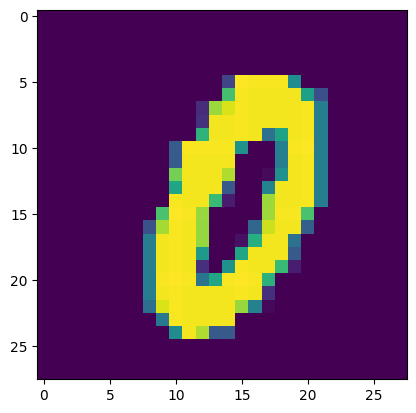

In [6]:
#dataset is in arrays to show it clearfully we used matplotlib library called imshow to show our data in image form
plt.imshow(X_train[34])

In [7]:
#reason to divide our dataset to its maximum number 255 to get low values so our weights would not be high
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#used forword propagation called Sequenial
model = Sequential()

In [10]:
#input layer used flatten to convert our 3D or 2D dataset to 1D and giving its shape 28,28
model.add(Flatten(input_shape=(28,28)))

In [11]:
#hidden layer
#most famous activation funtion used relu and used 128 nodes that set to our range of data
model.add(Dense(128,activation='relu'))

In [12]:
#hidden layer
#most famous activation funtion used relu and used 128 nodes that set to our range of data
model.add(Dense(32,activation='relu'))

In [13]:
#output layer
#used softmax activaiton funtion for multiclass classification problem
model.add(Dense(10,activation='softmax'))

In [14]:
#to saw our total number of weights and biasa and its all total
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#compile our moidel using sparse_categorical_crossentropy for not to do one hot encoding
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
#fir to train our model with 100 epocs with validation size 20 percent and store in hhistory variable to plot our loss
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2852 - accuracy: 0.9168 - val_loss: 0.1530 - val_accuracy: 0.9549
Epoch 2/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1196 - accuracy: 0.9632 - val_loss: 0.1102 - val_accuracy: 0.9679
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0831 - accuracy: 0.9743 - val_loss: 0.0986 - val_accuracy: 0.9701
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.1072 - val_accuracy: 0.9704
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.1244 - val_accuracy: 0.9653
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.1028 - val_accuracy: 0.9733
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.1054 - val_accurac

In [17]:
#gives you probability of each image of text 0 1 2 3 4 5 6 7 8 9
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[4.9679306e-17, 1.5145885e-19, 9.2796049e-12, ..., 9.9999994e-01,
        5.3764436e-20, 1.4862561e-13],
       [5.3975453e-21, 1.2265039e-12, 9.9999994e-01, ..., 2.4685076e-23,
        1.4745308e-15, 5.5294622e-30],
       [3.8452839e-14, 9.9999934e-01, 2.0268248e-10, ..., 4.8462985e-09,
        5.5651122e-07, 1.6390843e-12],
       ...,
       [9.8706675e-27, 1.4590276e-21, 1.0578023e-24, ..., 3.5196041e-11,
        2.0445414e-19, 3.0998862e-10],
       [2.8274706e-23, 6.0910785e-27, 1.1304790e-32, ..., 1.3276667e-25,
        6.6971798e-17, 4.5476839e-22],
       [3.5264535e-21, 1.2031888e-21, 1.1362398e-21, ..., 8.0196770e-29,
        1.9863648e-22, 1.6819988e-27]], dtype=float32)

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
#it tells you that the first image is 7
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_pred = y_prob.argmax(axis=1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9743

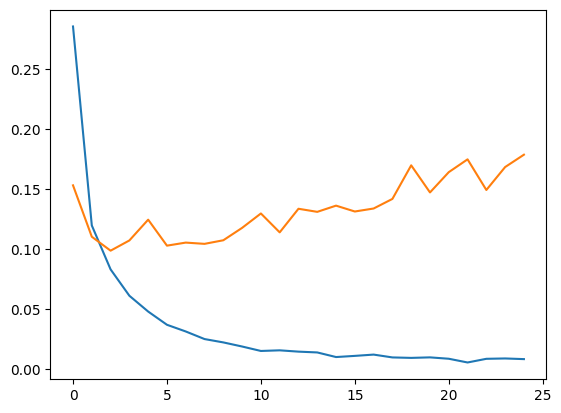

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

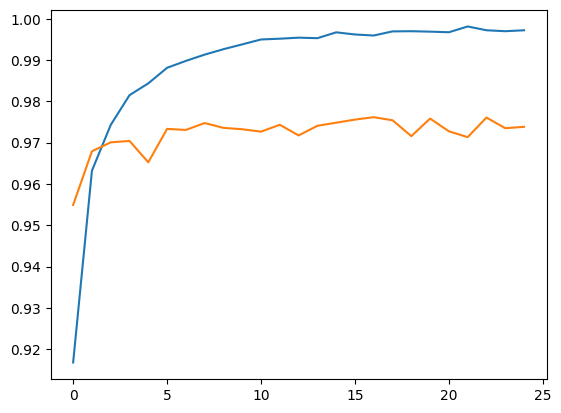

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

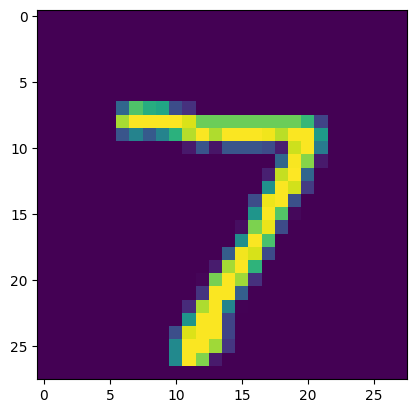

In [24]:
#take a photo from X_test to predict the what is the value ?
plt.imshow(X_test[0])

In [25]:
#now pass that value and and predict that
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([7])

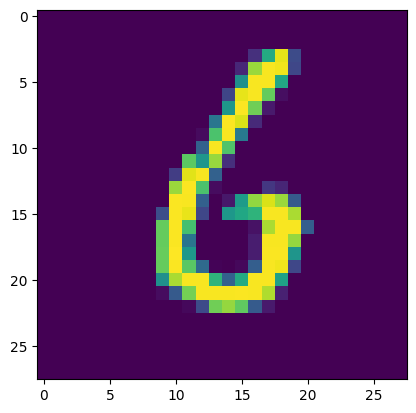

In [26]:
#take a photo from X_test to predict the what is the value ?
plt.imshow(X_test[50])

In [27]:
#now pass that value and and predict that
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([6])